# 3. 시장 측면: 국가(대륙) 간 상관관계 분석

* 비고) cont_df.csv, NetflixsRevenue2018toQ2_2020.csv, NetflixSubscribersbyCountryfrom2018toQ2_2020.csv 활용
* 수익, 구독자 수와의 상관관계 분석


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 파일 경로(파이썬 파일과 같은 폴더)를 찾고, 변수 file_path_cont_df에 저장 - 대륙별, 년도별 넷플릭스 데이터
file_path_cont_df = './datathon-main/cont_df.csv'

# read_csv() 함수로 데이터프레임 변환. 변수 cont_df에 저장
cont_df = pd.read_csv(file_path_cont_df)
cont_df

,Unnamed: 0,date_added,cont,country
0,0,2021,United States and Canada,United States
1,1,2021,"Europe, Middle East, and Africa",South Africa
2,2,2021,Asia-Pacific,India
3,3,2021,United States and Canada,United States
4,4,2021,"Europe, Middle East, and Africa",Ghana
...,...,...,...,...
9889,9889,2016,"Europe, Middle East, and Africa",Jordan
9890,9890,2019,United States and Canada,United States
9891,9891,2019,United States and Canada,United States
9892,9892,2020,United States and Canada,United States


## (1) 국가(대륙) 단위

In [2]:
# 파일 경로(파이썬 파일과 같은 폴더)를 찾고, 변수 file_path_continent_subs에 저장 - 2018~2020 대륙별 구독자 수
file_path_continent_subs = './datathon-main/NetflixSubscribersbyCountryfrom2018toQ2_2020.csv'

# read_csv() 함수로 데이터프레임 변환. 변수 df_continent_subs에 저장
df_continent_subs = pd.read_csv(file_path_continent_subs)
print(df_continent_subs)
print('\n')

# 같은 시기 대륙별로 벌어들인 액수.csv
file_path_continent_revenue = './datathon-main/NetflixsRevenue2018toQ2_2020.csv'

# read_csv() 함수로 데이터프레임 변환. 변수 dfcontinent_revenue에 저장
df_continent_revenue = pd.read_csv(file_path_continent_revenue)
print(df_continent_revenue)
print('\n')


                              Area  Q1 - 2018  Q2 - 2018  Q3 - 2018  \
0         United States and Canada   60909000   61870000   63010000   
1  Europe, Middle East, and Africa   29339000   31317000   33836000   
2                    Latin America   21260000   22795000   24115000   
3                     Asia-Pacific    7394000    8372000    9461000   

   Q4 - 2018  Q1 - 2019  Q2 - 2019  Q3 - 2019  Q4 - 2019  Q1 - 2020  Q2 - 2020  
0   64757000   66633000   66501000   67114000   67662000   69969000   72904000  
1   37818000   42542000   44229000   47355000   51778000   58734000   61483000  
2   26077000   27547000   27890000   29380000   31417000   34318000   36068000  
3   10607000   12141000   12942000   14485000   16233000   19835000   22492000  


                              Area   Q1 - 2018   Q2 - 2018   Q3 - 2018  \
0         United States and Canada  1976157000  2049546000  2094850000   
1  Europe, Middle East, and Africa   886649000   975497000  1004749000   
2              

### ① 구독자 수와 수입의 상관관계 분석
상관분석을 통해 
독립적으로 움직이는 두 변수들 사이의 관계(상관관계)의 강도 도출

In [3]:
# 두 데이터프레임 병합

# 데이터프레임 합치기 - 교집합. Area열을 기준으로 합치기
df_merge_by_area = pd.merge(df_continent_subs, df_continent_revenue, how='inner', on='Area')
df_merge_by_area

,Area,Q1 - 2018_x,Q2 - 2018_x,Q3 - 2018_x,Q4 - 2018_x,Q1 - 2019_x,Q2 - 2019_x,Q3 - 2019_x,Q4 - 2019_x,Q1 - 2020_x,...,Q1 - 2018_y,Q2 - 2018_y,Q3 - 2018_y,Q4 - 2018_y,Q1 - 2019_y,Q2 - 2019_y,Q3 - 2019_y,Q4 - 2019_y,Q1 - 2020_y,Q2 - 2020_y
0,United States and Canada,60909000,61870000,63010000,64757000,66633000,66501000,67114000,67662000,69969000,...,1976157000,2049546000,2094850000,2160979000,2256851000,2501199000,2621250000,2671908000,2702776000,2839670000
1,"Europe, Middle East, and Africa",29339000,31317000,33836000,37818000,42542000,44229000,47355000,51778000,58734000,...,886649000,975497000,1004749000,1096812000,1233379000,1319087000,1428040000,1562561000,1723474000,1892537000
2,Latin America,21260000,22795000,24115000,26077000,27547000,27890000,29380000,31417000,34318000,...,540182000,568071000,562307000,567137000,630472000,677136000,741434000,746392000,793453000,785368000
3,Asia-Pacific,7394000,8372000,9461000,10607000,12141000,12942000,14485000,16233000,19835000,...,199117000,221252000,248691000,276756000,319602000,349494000,382304000,418121000,483660000,569140000


In [4]:
# 강도는 상관계수로 나타내어 표시
# 상관계수 r = x와 y가 함께 변하는 정도 / x와 y가 각각 변하는 정도
print(df_merge_by_area[['Q1 - 2018_x','Q1 - 2018_y']].corr())

             Q1 - 2018_x  Q1 - 2018_y
Q1 - 2018_x     1.000000     0.997518
Q1 - 2018_y     0.997518     1.000000


In [5]:
print(df_merge_by_area[['Q2 - 2018_x','Q2 - 2018_y']].corr())

             Q2 - 2018_x  Q2 - 2018_y
Q2 - 2018_x     1.000000     0.996404
Q2 - 2018_y     0.996404     1.000000


In [6]:
print(df_merge_by_area[['Q3 - 2018_x','Q3 - 2018_y']].corr())

             Q3 - 2018_x  Q3 - 2018_y
Q3 - 2018_x     1.000000     0.994023
Q3 - 2018_y     0.994023     1.000000


In [7]:
print(df_merge_by_area[['Q4 - 2018_x','Q4 - 2018_y']].corr())

             Q4 - 2018_x  Q4 - 2018_y
Q4 - 2018_x     1.000000     0.990169
Q4 - 2018_y     0.990169     1.000000


In [8]:
print(df_merge_by_area[['Q1 - 2019_x','Q1 - 2019_y']].corr())

             Q1 - 2019_x  Q1 - 2019_y
Q1 - 2019_x     1.000000     0.990344
Q1 - 2019_y     0.990344     1.000000


In [9]:
print(df_merge_by_area[['Q2 - 2019_x','Q2 - 2019_y']].corr())

             Q2 - 2019_x  Q2 - 2019_y
Q2 - 2019_x      1.00000      0.98546
Q2 - 2019_y      0.98546      1.00000


In [10]:
print(df_merge_by_area[['Q3 - 2019_x','Q3 - 2019_y']].corr())

             Q3 - 2019_x  Q3 - 2019_y
Q3 - 2019_x     1.000000     0.982464
Q3 - 2019_y     0.982464     1.000000


In [11]:
print(df_merge_by_area[['Q4 - 2019_x','Q4 - 2019_y']].corr())

             Q4 - 2019_x  Q4 - 2019_y
Q4 - 2019_x     1.000000     0.976012
Q4 - 2019_y     0.976012     1.000000


In [12]:
print(df_merge_by_area[['Q1 - 2020_x','Q1 - 2020_y']].corr())

             Q1 - 2020_x  Q1 - 2020_y
Q1 - 2020_x     1.000000     0.970857
Q1 - 2020_y     0.970857     1.000000


In [13]:
print(df_merge_by_area[['Q2 - 2020_x','Q2 - 2020_y']].corr())

             Q2 - 2020_x  Q2 - 2020_y
Q2 - 2020_x     1.000000     0.973854
Q2 - 2020_y     0.973854     1.000000


r값이 0.7~ 1.0 
=> 같은 시기별의 두 변수(구독자수, 수입액수)는 강한 양의 상관관계를 가지고 있음

### ② 시각화
#### i) 시간이 x축, 구독자 수가 y축인 대륙별 선그래프

In [14]:
df_continent_subs

,Area,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
0,United States and Canada,60909000,61870000,63010000,64757000,66633000,66501000,67114000,67662000,69969000,72904000
1,"Europe, Middle East, and Africa",29339000,31317000,33836000,37818000,42542000,44229000,47355000,51778000,58734000,61483000
2,Latin America,21260000,22795000,24115000,26077000,27547000,27890000,29380000,31417000,34318000,36068000
3,Asia-Pacific,7394000,8372000,9461000,10607000,12141000,12942000,14485000,16233000,19835000,22492000


In [15]:
##### 전처리

In [16]:
# 열이름을 Area로 하고, 리스트를 value로 갖는 딕셔너리(2차원 배열)
subscribers_USC = {'United States and Canada':[60909000, 61870000, 63010000, 64757000, 66633000, 66501000, 67114000, 67662000, 69969000, 72904000]}
subscribers_Eur_ME_Af = {'Europe, Middle East, and Africa':[29339000, 31317000, 33836000, 37818000, 42542000, 44229000, 47355000, 51778000, 58734000, 61483000]}
subscribers_LA = {'Latin America' : [21260000, 22795000, 24115000, 26077000, 27547000, 27890000, 29380000, 31417000, 34318000, 36068000]}
subscribers_AP = {'Asia-Pacific' : [7394000, 8372000, 9461000, 10607000, 12141000, 12942000, 14485000, 16233000, 19835000, 22492000]}

In [17]:
df_subscribers_USC = pd.DataFrame(subscribers_USC)
df_subscribers_USC

# 열 추가
df_subscribers_USC['time'] = ['Q1 - 2018', 'Q2 - 2018', 'Q3 - 2018', 'Q4 - 2018', 'Q1 - 2019', 'Q2 - 2019', 'Q3 - 2019', 'Q4 - 2019', 'Q1 - 2020', 'Q2 - 2020']

In [18]:
df_subscribers_USC

,United States and Canada,time
0,60909000,Q1 - 2018
1,61870000,Q2 - 2018
2,63010000,Q3 - 2018
3,64757000,Q4 - 2018
4,66633000,Q1 - 2019
5,66501000,Q2 - 2019
6,67114000,Q3 - 2019
7,67662000,Q4 - 2019
8,69969000,Q1 - 2020
9,72904000,Q2 - 2020


In [19]:
df_subscribers_Eur_ME_Af = pd.DataFrame(subscribers_Eur_ME_Af)
df_subscribers_Eur_ME_Af

# 열 추가
df_subscribers_Eur_ME_Af['time'] = ['Q1 - 2018', 'Q2 - 2018', 'Q3 - 2018', 'Q4 - 2018', 'Q1 - 2019', 'Q2 - 2019', 'Q3 - 2019', 'Q4 - 2019', 'Q1 - 2020', 'Q2 - 2020']

In [20]:
df_subscribers_Eur_ME_Af

,"Europe, Middle East, and Africa",time
0,29339000,Q1 - 2018
1,31317000,Q2 - 2018
2,33836000,Q3 - 2018
3,37818000,Q4 - 2018
4,42542000,Q1 - 2019
5,44229000,Q2 - 2019
6,47355000,Q3 - 2019
7,51778000,Q4 - 2019
8,58734000,Q1 - 2020
9,61483000,Q2 - 2020


In [21]:
df_subscribers_LA = pd.DataFrame(subscribers_LA)
df_subscribers_LA

# 열 추가
df_subscribers_LA['time'] = ['Q1 - 2018', 'Q2 - 2018', 'Q3 - 2018', 'Q4 - 2018', 'Q1 - 2019', 'Q2 - 2019', 'Q3 - 2019', 'Q4 - 2019', 'Q1 - 2020', 'Q2 - 2020']

In [22]:
df_subscribers_LA

,Latin America,time
0,21260000,Q1 - 2018
1,22795000,Q2 - 2018
2,24115000,Q3 - 2018
3,26077000,Q4 - 2018
4,27547000,Q1 - 2019
5,27890000,Q2 - 2019
6,29380000,Q3 - 2019
7,31417000,Q4 - 2019
8,34318000,Q1 - 2020
9,36068000,Q2 - 2020


In [23]:
df_subscribers_AP = pd.DataFrame(subscribers_AP)
df_subscribers_AP

# 열 추가
df_subscribers_AP['time'] = ['Q1 - 2018', 'Q2 - 2018', 'Q3 - 2018', 'Q4 - 2018', 'Q1 - 2019', 'Q2 - 2019', 'Q3 - 2019', 'Q4 - 2019', 'Q1 - 2020', 'Q2 - 2020']

In [24]:
df_subscribers_AP

,Asia-Pacific,time
0,7394000,Q1 - 2018
1,8372000,Q2 - 2018
2,9461000,Q3 - 2018
3,10607000,Q4 - 2018
4,12141000,Q1 - 2019
5,12942000,Q2 - 2019
6,14485000,Q3 - 2019
7,16233000,Q4 - 2019
8,19835000,Q1 - 2020
9,22492000,Q2 - 2020


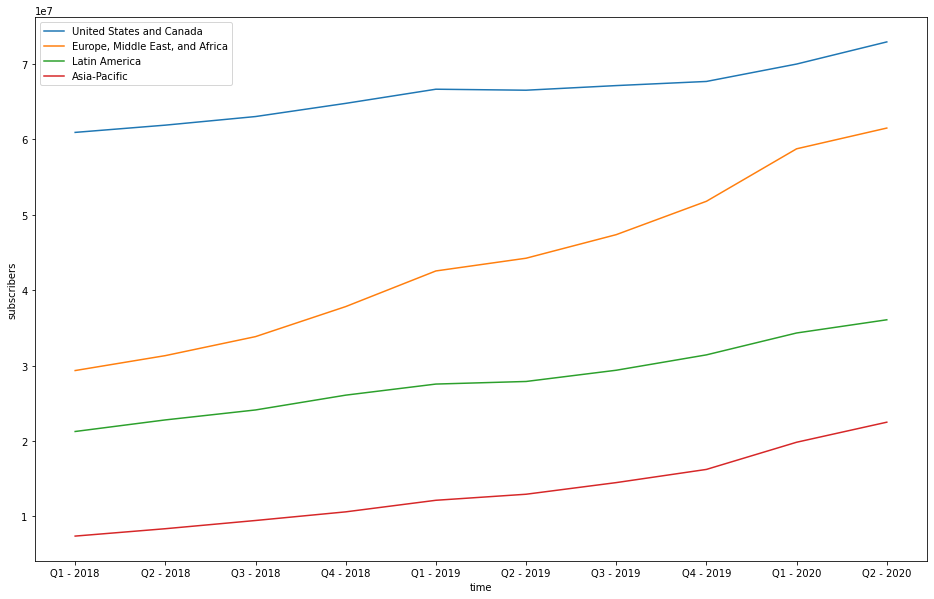

In [25]:
# 시간의 흐름에 따른 대륙(국가)별 구독자 수 변화
plt.figure(figsize = (16, 10))

ax = sns.lineplot(data=df_subscribers_USC, x=df_subscribers_USC.time, y=df_subscribers_USC['United States and Canada'].values, label = 'United States and Canada')
ax = sns.lineplot(data=df_subscribers_Eur_ME_Af, x=df_subscribers_Eur_ME_Af.time, y=df_subscribers_Eur_ME_Af['Europe, Middle East, and Africa'].values, label = 'Europe, Middle East, and Africa')
ax = sns.lineplot(data=df_subscribers_LA, x=df_subscribers_LA.time, y=df_subscribers_LA['Latin America'].values, label = 'Latin America')
ax = sns.lineplot(data=df_subscribers_AP, x=df_subscribers_AP.time, y=df_subscribers_AP['Asia-Pacific'].values, label = 'Asia-Pacific')


plt.legend()
plt.xlabel("time")
plt.ylabel("subscribers")
plt.show()

#### 인사이트
* 기울기를 보면 유럽, 중동, 아프리카 대륙의 구독자 수의 증가 추세가 다른 대륙에 비해 가장 세가 가파름을 알 수 있음

#### ii) 시간이 x축, 수입 금액이 y축인 대륙별 선그래프

In [1]:
df_continent_revenue

NameError: name 'df_continent_revenue' is not defined

##### 전처리

In [27]:
# 열이름을 Area로 하고, 리스트를 value로 갖는 딕셔너리(2차원 배열)
revenue_USC = {'United States and Canada':[1976157000, 2049546000, 2094850000, 2160979000, 2256851000, 2501199000, 2621250000, 2671908000, 2702776000, 2839670000]}
revenue_Eur_ME_Af = {'Europe, Middle East, and Africa':[886649000, 975497000, 1004749000, 1096812000, 1233379000, 1319087000, 1428040000, 1562561000, 1723474000, 1892537000]}
revenue_LA = {'Latin America' : [540182000, 568071000, 562307000, 567137000, 630472000, 677136000, 741434000, 746392000, 793453000, 785368000]}
revenue_AP = {'Asia-Pacific' : [199117000, 221252000, 248691000, 276756000, 319602000, 349494000, 382304000, 418121000, 483660000, 569140000]}

In [28]:
df_revenue_USC = pd.DataFrame(revenue_USC)
df_revenue_USC

# 열 추가
df_revenue_USC['time'] = ['Q1 - 2018', 'Q2 - 2018', 'Q3 - 2018', 'Q4 - 2018', 'Q1 - 2019', 'Q2 - 2019', 'Q3 - 2019', 'Q4 - 2019', 'Q1 - 2020', 'Q2 - 2020']

In [29]:
df_revenue_USC

,United States and Canada,time
0,1976157000,Q1 - 2018
1,2049546000,Q2 - 2018
2,2094850000,Q3 - 2018
3,2160979000,Q4 - 2018
4,2256851000,Q1 - 2019
5,2501199000,Q2 - 2019
6,2621250000,Q3 - 2019
7,2671908000,Q4 - 2019
8,2702776000,Q1 - 2020
9,2839670000,Q2 - 2020


In [30]:
df_revenue_Eur_ME_Af = pd.DataFrame(revenue_Eur_ME_Af)
df_revenue_Eur_ME_Af

# 열 추가
df_revenue_Eur_ME_Af['time'] = ['Q1 - 2018', 'Q2 - 2018', 'Q3 - 2018', 'Q4 - 2018', 'Q1 - 2019', 'Q2 - 2019', 'Q3 - 2019', 'Q4 - 2019', 'Q1 - 2020', 'Q2 - 2020']

In [31]:
df_revenue_Eur_ME_Af

,"Europe, Middle East, and Africa",time
0,886649000,Q1 - 2018
1,975497000,Q2 - 2018
2,1004749000,Q3 - 2018
3,1096812000,Q4 - 2018
4,1233379000,Q1 - 2019
5,1319087000,Q2 - 2019
6,1428040000,Q3 - 2019
7,1562561000,Q4 - 2019
8,1723474000,Q1 - 2020
9,1892537000,Q2 - 2020


In [32]:
df_revenue_LA = pd.DataFrame(revenue_LA)
df_revenue_LA

# 열 추가
df_revenue_LA['time'] = ['Q1 - 2018', 'Q2 - 2018', 'Q3 - 2018', 'Q4 - 2018', 'Q1 - 2019', 'Q2 - 2019', 'Q3 - 2019', 'Q4 - 2019', 'Q1 - 2020', 'Q2 - 2020']

In [33]:
df_revenue_LA

,Latin America,time
0,540182000,Q1 - 2018
1,568071000,Q2 - 2018
2,562307000,Q3 - 2018
3,567137000,Q4 - 2018
4,630472000,Q1 - 2019
5,677136000,Q2 - 2019
6,741434000,Q3 - 2019
7,746392000,Q4 - 2019
8,793453000,Q1 - 2020
9,785368000,Q2 - 2020


In [34]:
df_revenue_AP = pd.DataFrame(revenue_AP)
df_revenue_AP

# 열 추가
df_revenue_AP['time'] = ['Q1 - 2018', 'Q2 - 2018', 'Q3 - 2018', 'Q4 - 2018', 'Q1 - 2019', 'Q2 - 2019', 'Q3 - 2019', 'Q4 - 2019', 'Q1 - 2020', 'Q2 - 2020']

In [35]:
df_revenue_AP

,Asia-Pacific,time
0,199117000,Q1 - 2018
1,221252000,Q2 - 2018
2,248691000,Q3 - 2018
3,276756000,Q4 - 2018
4,319602000,Q1 - 2019
5,349494000,Q2 - 2019
6,382304000,Q3 - 2019
7,418121000,Q4 - 2019
8,483660000,Q1 - 2020
9,569140000,Q2 - 2020


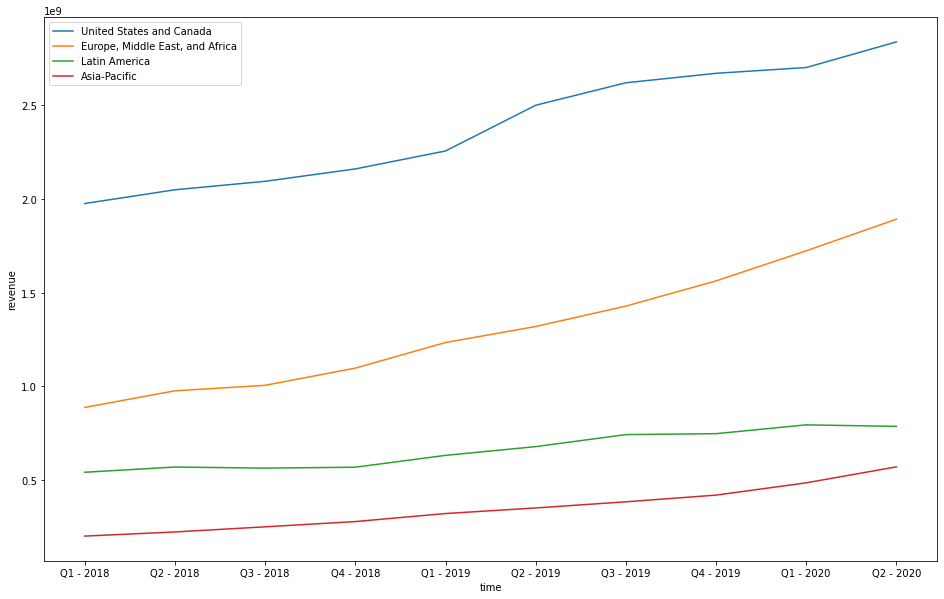

In [36]:
# 시간의 흐름에 따른 대륙(국가)별 수익 변화
plt.figure(figsize = (16, 10))

ax = sns.lineplot(data=df_revenue_USC, x=df_revenue_USC.time, y=df_revenue_USC['United States and Canada'].values, label = 'United States and Canada')
ax = sns.lineplot(data=df_revenue_Eur_ME_Af, x=df_revenue_Eur_ME_Af.time, y=df_revenue_Eur_ME_Af['Europe, Middle East, and Africa'].values, label = 'Europe, Middle East, and Africa')
ax = sns.lineplot(data=df_revenue_LA, x=df_revenue_LA.time, y=df_revenue_LA['Latin America'].values, label = 'Latin America')
ax = sns.lineplot(data=df_revenue_AP, x=df_revenue_AP.time, y=df_revenue_AP['Asia-Pacific'].values, label = 'Asia-Pacific')


plt.legend()
plt.xlabel("time")
plt.ylabel("revenue")
plt.show()

#### 인사이트
* 북미와 유럽, 중동, 아프리카 대륙의 수입 증가세가 남미나 아시아 태평양 지역보다 2배 정도 가파름

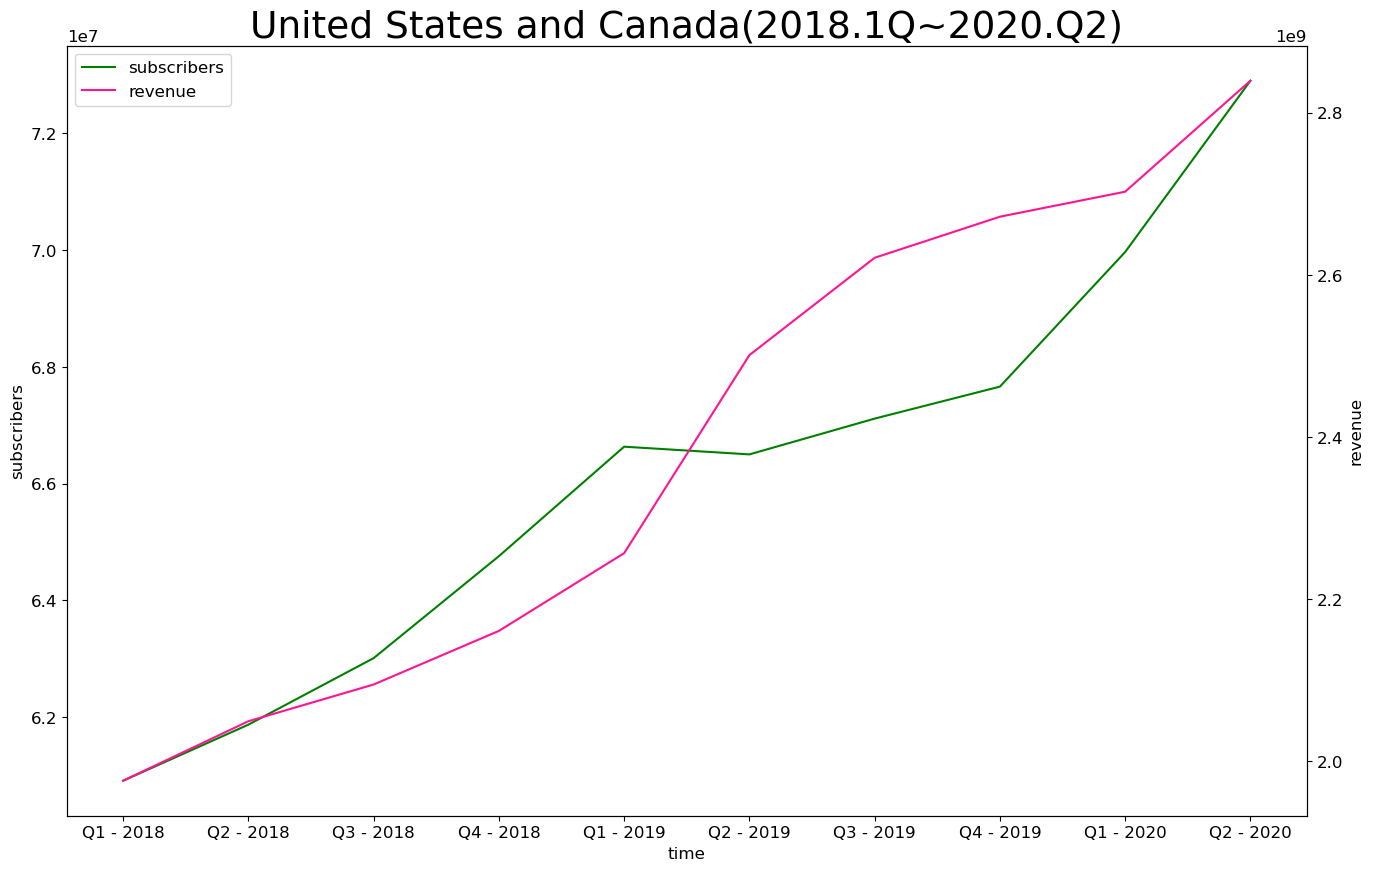

In [37]:
# 구독자 수, 수익의 2중 Y축
# 기간별 대륙(국가)별 구독자 수와 수익 변화 추이

plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

# United States and Canada
x = df_subscribers_USC.time
y1 = df_subscribers_USC['United States and Canada'].values
y2 = df_revenue_USC['United States and Canada'].values

fig, ax1 = plt.subplots()
ax1.set_xlabel('time')
ax1.set_ylabel('subscribers')
line1 = ax1.plot(x, y1, color='green', label='subscribers')


ax2 = ax1.twinx()
ax2.set_ylabel('revenue')
line2 = ax2.plot(x, y2, color='deeppink', label='revenue')

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.title('United States and Canada(2018.1Q~2020.Q2)', size = 27)
ax1.legend(lines, labels, loc='upper left')
plt.show()

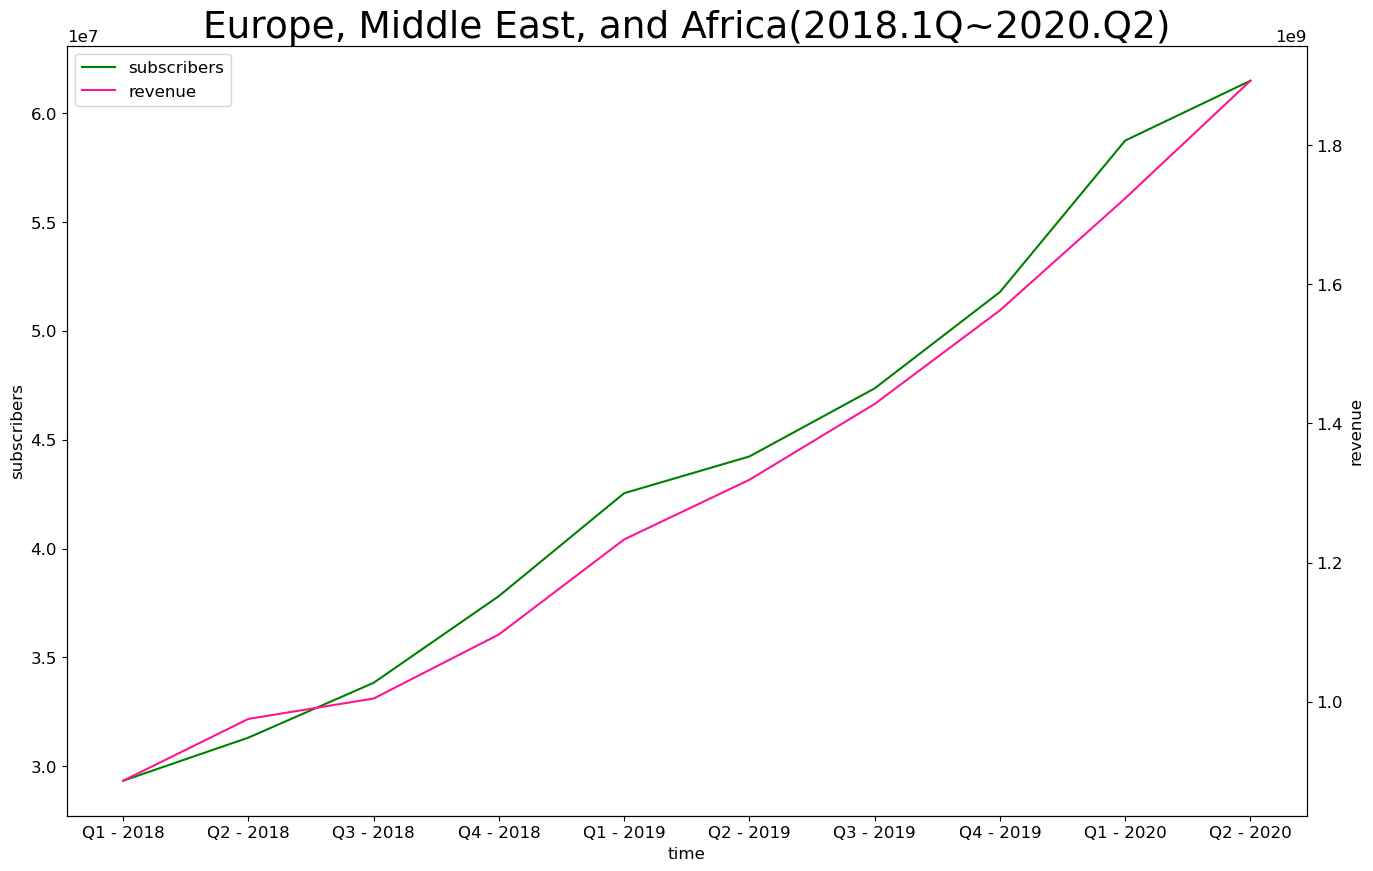

In [38]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

# Europe, Middle East, and Africa'
x = df_subscribers_Eur_ME_Af.time
y1 = df_subscribers_Eur_ME_Af['Europe, Middle East, and Africa'].values
y2 = df_revenue_Eur_ME_Af['Europe, Middle East, and Africa'].values

fig, ax1 = plt.subplots()
ax1.set_xlabel('time')
ax1.set_ylabel('subscribers')
line1 = ax1.plot(x, y1, color='green', label='subscribers')


ax2 = ax1.twinx()
ax2.set_ylabel('revenue')
line2 = ax2.plot(x, y2, color='deeppink', label='revenue')

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.title('Europe, Middle East, and Africa(2018.1Q~2020.Q2)', size = 27)
ax1.legend(lines, labels, loc='upper left')
plt.show()

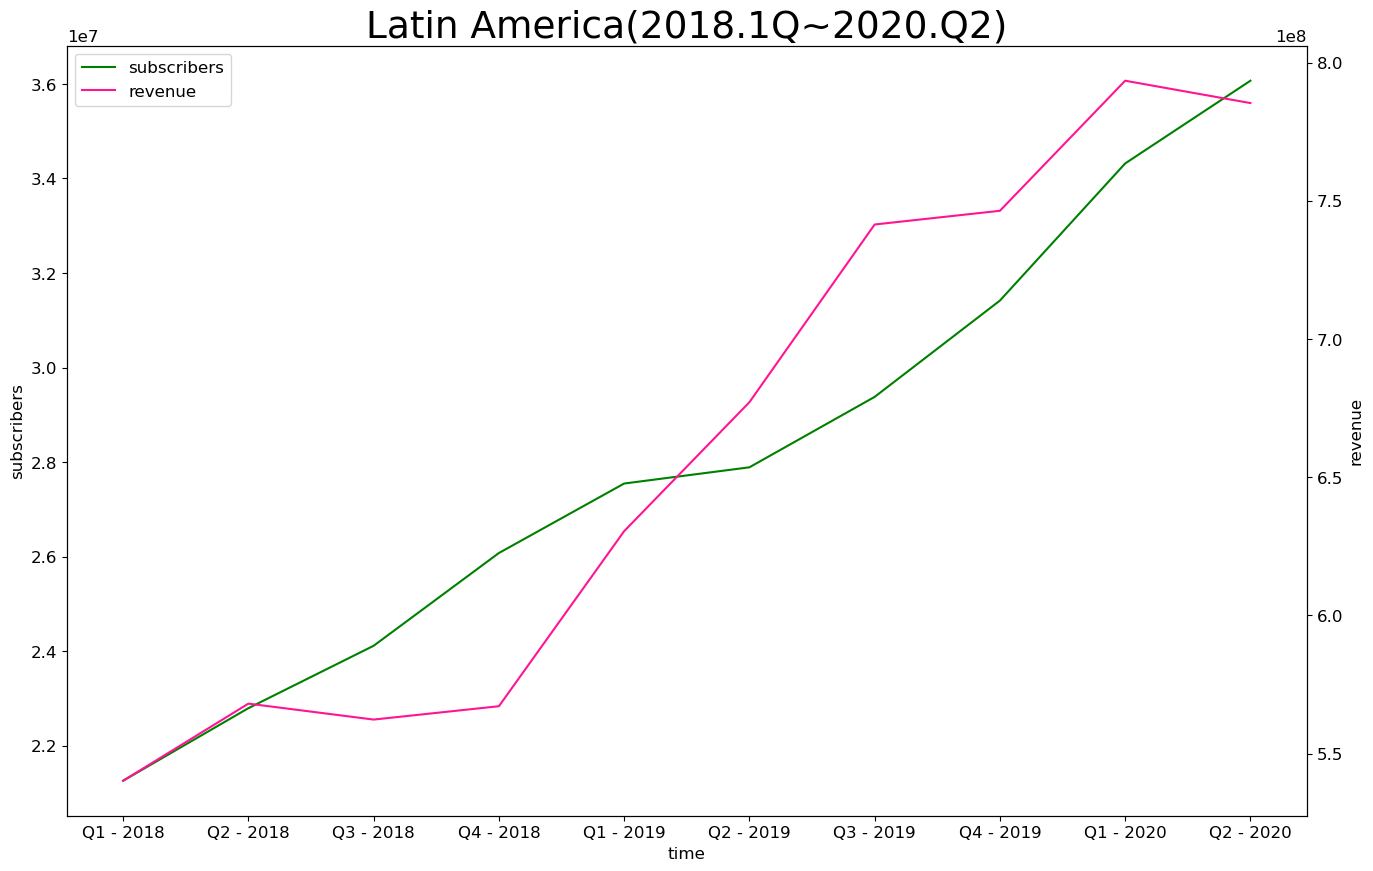

In [39]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

# Latin America
x = df_subscribers_LA.time
y1 = df_subscribers_LA['Latin America'].values
y2 = df_revenue_LA['Latin America'].values

fig, ax1 = plt.subplots()
ax1.set_xlabel('time')
ax1.set_ylabel('subscribers')
line1 = ax1.plot(x, y1, color='green', label='subscribers')


ax2 = ax1.twinx()
ax2.set_ylabel('revenue')
line2 = ax2.plot(x, y2, color='deeppink', label='revenue')

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.title('Latin America(2018.1Q~2020.Q2)', size = 27)
ax1.legend(lines, labels, loc='upper left')
plt.show()

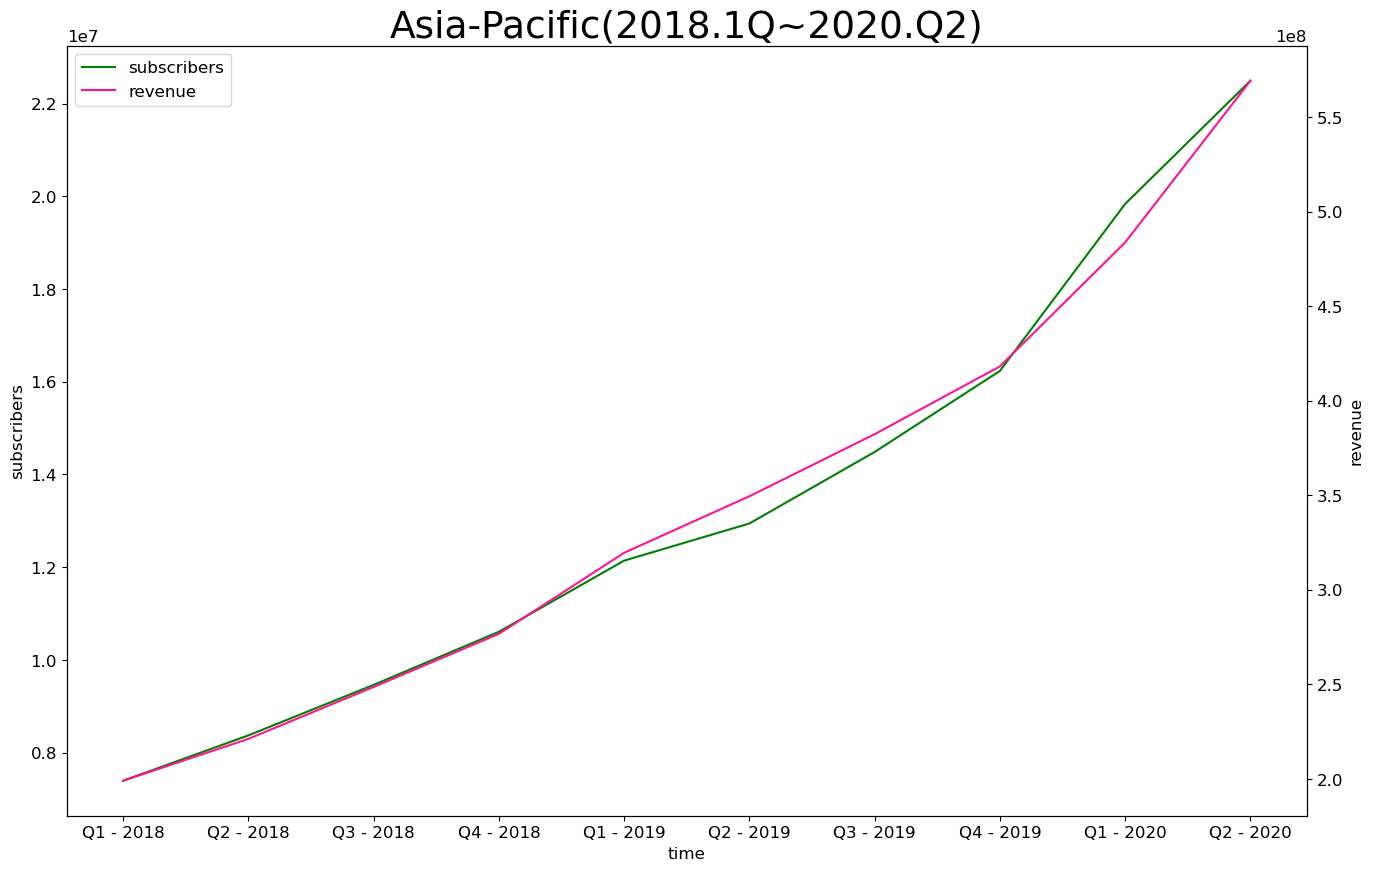

In [40]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

# Latin America
x = df_subscribers_AP.time
y1 = df_subscribers_AP['Asia-Pacific'].values
y2 = df_revenue_AP['Asia-Pacific'].values

fig, ax1 = plt.subplots()
ax1.set_xlabel('time')
ax1.set_ylabel('subscribers')
line1 = ax1.plot(x, y1, color='green', label='subscribers')


ax2 = ax1.twinx()
ax2.set_ylabel('revenue')
line2 = ax2.plot(x, y2, color='deeppink', label='revenue')

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.title('Asia-Pacific(2018.1Q~2020.Q2)', size = 27)
ax1.legend(lines, labels, loc='upper left')
plt.show()

### 인사이트
* 같은 시기에 구독자 수의 증가에 따른 수입 액 증가 추이는 전반적으로 비슷한 양상을 보임
* 북미와 남미에서 2018년 2분기부터 2019년 1분기와 2분기 사이까지 구독자 수의 증가 추세에 비해 정체되어있던 수입 -> 2019 1분기와 2분기 사이부터 2020년 2분기 사이에 가파르게 상승 => ㄱ